## Polytope Climate-DT example notebook

This notebook shows how to use earthkit-data and earthkit-maps to pull destination-earth data from LUMI and plot it using earthkit-maps.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this.

You will need your credentials to be set up via config file (~/.polytopeapirc) or by environment variables

In [1]:
{
    "user_email": "<user_email>",
    "user_key": "<user_key",
}

{'user_email': '<user_email>', 'user_key': '<user_key'}

You can also set POLYTOPE_USER_EMAIL and POLYTOPE_USER_KEY in your environment. Note that the email is not required if using a token-based authentication.

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-maps
* pip install earthkit-regrid  (Optional for spectral variables)
* pip install cf-units         (Optional for unit conversion in maps)

If you do not have eccodes installed please install eccodes using conda as it is a dependency of earthkit, or install earthkit via conda

* conda install eccodes -c conda-forge
* conda install earthkit-data -c conda-forge

In [8]:
import earthkit.data
import earthkit.maps
import earthkit.regrid

# This request matches multiple parameter of the climate DT

request = {
    'activity': 'ScenarioMIP',
    'class': 'd1',
    'dataset': 'climate-dt',
    'date': '20200101',
    'experiment': 'SSP3-7.0',
    'expver': '0001',
    'generation': '1',
    'levtype': 'sfc',
    'model': 'IFS-NEMO',
    'param': '134/165/166',
    'realization': '1',
    'resolution': 'standard',
    'stream': 'clte',
    'time': '0100', # '0100/0200/0300/0400/0500/0600'
    'type': 'fc'
}

#data is an earthkit streaming object but with stream=False will download data immediately 
data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)


2024-05-14 11:34:56 - INFO - Sending request...
{'request': 'activity: ScenarioMIP\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            "date: '20200101'\n"
            'experiment: SSP3-7.0\n'
            "expver: '0001'\n"
            "generation: '1'\n"
            'levtype: sfc\n'
            'model: IFS-NEMO\n'
            'param: 134/165/166\n'
            "realization: '1'\n"
            'resolution: standard\n'
            'stream: clte\n'
            "time: '0100'\n"
            'type: fc\n',
 'verb': 'retrieve'}


2024-05-14 11:34:58 - INFO - Request accepted. Please poll http://polytope.lumi.apps.dte.destination-earth.eu/api/v1/requests/3eed1b77-ad6f-4c65-b930-e6a114e488f3 for status
2024-05-14 11:34:58 - INFO - Checking request status (3eed1b77-ad6f-4c65-b930-e6a114e488f3)...
2024-05-14 11:34:59 - INFO - The current status of the request is 'queued'
2024-05-14 11:34:59 - INFO - The current status of the request is 'processing'
2024-05-14 11:35:01 - INFO - The current status of the request is 'processed'


3eed1b77-ad6f-4c65-b930-e6a114e488f3:   0%|          | 0.00/1.37M [00:00<?, ?B/s]

In [9]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,sp,surface,0,20200101,100,0,fc,None,healpix
1,ecmf,10u,heightAboveGround,10,20200101,100,0,fc,None,healpix
2,ecmf,10v,heightAboveGround,10,20200101,100,0,fc,None,healpix


In [ ]:
style = earthkit.maps.Style(
    extend='both',
)

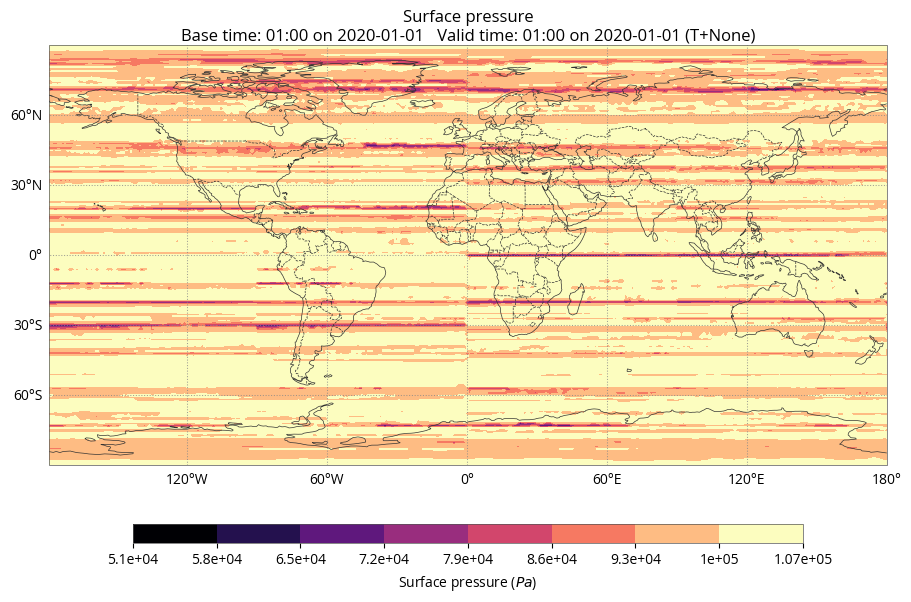

In [10]:
earthkit.maps.quickplot(data[0])